In [4]:
import math as m
import numpy as np
import random as rnd
import re
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import factorial2
from scipy.special import factorial
import scipy.stats as sps
%matplotlib inline

# 2.1

Juan has n=10 different pairs of socks (2n socks total). Every morning when he wakes up, he randomly chooses socks one at a time until he gets a pair (i.e., both socks from the fifth pair). Let X be the number of socks he chooses before he gets a pair (not including the sock that makes a pair). Find the PMF of X.

Hint: Define a ‘double factorial’ n!! as a factorial that skips every other number; for even numbers the factorial iterates down to 2, and for odd numbers the factorial iterates down to 1. For example, 10!!=10⋅8⋅6⋅...⋅2 and 9!!=9⋅7⋅5⋅...⋅1. This may be useful in counting the number of ways to select socks in a way that doesn’t create a pair.

In [5]:
# Creating pairs of socks with modulo arithmetic
socks = np.arange(1,21) % 10 + 1

print(np.arange(1,21))
print(socks)

# Logic for checking if a new sock has a matching sock
for i in range(1,len(socks)//2 + 2,1):
        print(socks[0:i])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 2  3  4  5  6  7  8  9 10  1  2  3  4  5  6  7  8  9 10  1]
[2]
[2 3]
[2 3 4]
[2 3 4 5]
[2 3 4 5 6]
[2 3 4 5 6 7]
[2 3 4 5 6 7 8]
[2 3 4 5 6 7 8 9]
[ 2  3  4  5  6  7  8  9 10]
[ 2  3  4  5  6  7  8  9 10  1]
[ 2  3  4  5  6  7  8  9 10  1  2]


4.67302
1.0
10.0


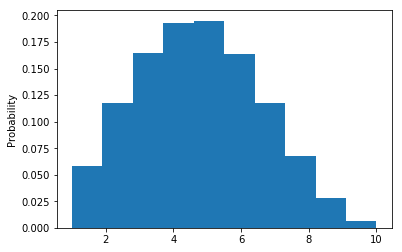

In [25]:
# Simulating probability of getting a pair
socks = np.arange(1,21) % 10 + 1

num_socks = np.zeros(100000)

for s in range(len(num_socks)):

    np.random.shuffle(socks)

    for i in range(1,len(socks)//2 + 2,1):
        if socks[i] in socks[0:i]:
            num_socks[s] = i
            break
            
print(np.mean(num_socks))

print(np.min(num_socks))
print(np.max(num_socks))

_ = plt.hist(num_socks, density = True)
_ = plt.ylabel('Probability')

### 2.1 Analytical Solution

First, let's start off with the denominator. This is the number of ways to select x unique socks. There are 20! ways to order all of the socks. Let's split the 20 socks into two 'groups': the unique socks we have picked (x) and 'everything else'. The specific socks in 'everything else' are indistinguishable - they simply count as one homogeneous group. We must therefore adjust the 20!, which counts the remaining (20-x)! socks as unique. This is similar to problem 1.2.b.

## $Denominator = \frac{\text{Ways to order all socks}}{\text{Adjust down overcounting of socks we don't care about}} = \frac{20!}{(20-x)!}$

Let's pretend we are picking sock 5. To get here, we already picked four socks. We had 20 choices for the first sock, 19 for the second, 18 for the third, and 17 for the fourth. This works out to $\frac{20!}{(20-x)!} = \frac{20!}{16!} = 20*19*18*17 = 116,280$.

The numerator is a bit more complicated. Conceptually it breaks down into two pieces:

1. The number of ways to get unique socks without making **any** pairs 
2. The probability of making a pair on the next pick

Let's start off with 1. First, there are 20!! ways to order the socks *without creating pairs*. After we pick the first socks, we have 18 choices for the second sock. This pattern continues since picking a unique sock removes its matching sock from subsequent choices. Just like in the denominator, we need to adjust this number down. We again split the counting into two 'groups': socks we have picked so far and 'everything else'. The indistinguishable 'everything else' is adjusted out by dividing by (20-2x)!!, just like in problem 1.2.b. The 2x here is because we care about *pairs* of socks left.

### $\text{Ways to get unique socks without any pairs} = \frac{\text{Ways to order pairs}}{\text{Adjust down overcounting of pairs we don't care about}} = \frac{20!!}{(20-2x)!!}$

Finally, The probability of making a pair on the next pick. Since we've picked x socks so far, we have x possible socks to match them to. We also have 20-x socks left in the pile. This simply works out to be:

## $\frac{\text{Pairs to match to}}{\text{Socks left}} = \frac{x}{20-x}$

Bringing it all together we have:

### $P(X = x) = \frac{\text{Ways to get x unique socks without making any pairs}}{\text{Ways to order the x socks}} * \text{Probability of x+1th sock making a pair}$

##  $P(X = x) = \frac{20!!/(20-2x)!!}{20!/(20-x)!}*\frac{x}{20-x}$

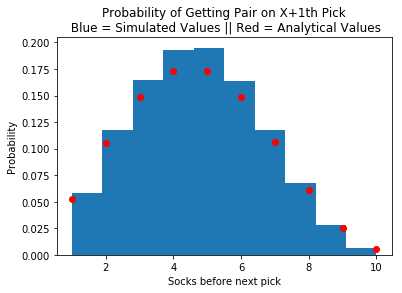

In [26]:
# Adding theoretical values to histogram
def pmf_socks(x):
    num = factorial2(20, exact = True)/factorial2(20-2*x, exact = True)
    denom = factorial(20, exact = True)/factorial(20-x, exact = True)
    
    adj = x/(20-x)
    
    return num/denom * adj
    
pmf_socks_v = np.vectorize(pmf_socks)
    
#

_ = plt.hist(num_socks, density = True)
_ = plt.ylabel('Probability')
_ = plt.xlabel('Socks before next pick')

_ = plt.plot(np.arange(1,11),
             pmf_socks_v(np.arange(1,11)), 
             'ro')

_ = plt.title('Probability of Getting Pair on X+1th Pick\n Blue = Simulated Values || Red = Analytical Values')

In [8]:
# Comparing simulated values to analytical values
prob_comp = pd.DataFrame({
    'Simulated': [np.mean(num_socks == x) for x in range(1,11,1)],
    'Analytical': pmf_socks_v(np.arange(1,11))
})

print(prob_comp)

   Analytical  Simulated
0    0.052632    0.05283
1    0.105263    0.10590
2    0.148607    0.14736
3    0.173375    0.17248
4    0.173375    0.17289
5    0.148607    0.14863
6    0.106692    0.10789
7    0.060967    0.06126
8    0.024941    0.02497
9    0.005542    0.00579


# 2.2

You flip a fair, two-sided coin 5 times. Let X be the length of the longest streak in the 5 flips (i.e., if you flip TTTTH, the longest streak is the TTTT, so X = 4). Given that you flip 3 heads, find the PMF of X.

In [9]:
# Computational solution
combs = np.array(list(set(list(it.permutations([0,0,1,1,1],5)))))

# Counting consecutive ones and resetting at zero
# Borrowed from:
# https://stackoverflow.com/questions/42129021/counting-consecutive-1s-in-numpy-array
def island_cumsum_vectorized(a):
    a_ext = np.concatenate(( [0], a, [0] ))
    idx = np.flatnonzero(a_ext[1:] != a_ext[:-1])
    a_ext[1:][idx[1::2]] = idx[::2] - idx[1::2]
    return a_ext.cumsum()[1:-1]

max_conseq = np.apply_along_axis(island_cumsum_vectorized, 1, combs)

max_conseq = np.max(max_conseq, 1)

print('Max 1 head in a row:')
print(combs[max_conseq == 1])
print(combs[max_conseq == 1].size/combs.size)
print('\n')

print('Max 2 heads in a row:')
print(combs[max_conseq == 2])
print(combs[max_conseq == 2].size/combs.size)
print('\n')

print('Max 3 heads in a row:')
print(combs[max_conseq == 3])
print(combs[max_conseq == 3].size/combs.size)
print('\n')

Max 1 head in a row:
[[1 0 1 0 1]]
0.1


Max 2 heads in a row:
[[1 1 0 1 0]
 [0 1 0 1 1]
 [0 1 1 0 1]
 [1 0 0 1 1]
 [1 0 1 1 0]
 [1 1 0 0 1]]
0.6


Max 3 heads in a row:
[[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]]
0.3




### 2.2 Analytical Solution

Let's first think about the denominator. There are 5! ways to order five distinct items in a group. However, we know that we will always have three heads and two tails. We must adjust the 5! down to remove overcounting each Head/Tail as a unique item. That means there are:

## $\frac{5!}{3!*2!} = 10$

ways to order the three heads and two tails. Now, let's think about the longest and shortest streaks.

The shortest streak is 1 and the only way to construct this is with [H,T,H,T,H]. That means there is a $\frac{1}{10} = .1$ probability of observing this event.

Next, the longest streak is having the three heads stacked right next to each other. We can think of 'moving' the three consecutive Hs along the five available slots:

[**H**,**H**,**H**,T,T]  
[T,**H**,**H**,**H**,T]  
[T,T,**H**,**H**,**H**]  

So $P(3) = 3/10 = .3$. 

Finally, we could explicitly count the number of ways to observe a streak of two. An easier approach requires remembering that the probability mass function **must** sum to one. Since there are only three outcomes P{1,2,3} and we know two of them, we can simply use some algebra to figure out P(2):

$1 = P(1) + P(2) + P(3)$  
$1 = .1 + P(2) + .3$  
$1 - .1 -.3 = P(2)$  
$0.6 = P(2)$  

To sum things up we have:  
$P(1) = 10\%$  
$P(2) = 60\%$  
$P(3) = 30\%$  


# 2.3

CJ is trick-or-treating on a street with 10 houses. He selects houses at random to visit; however, if he visits any one house a second time, he is turned away. If CJ selects 5 houses randomly (of course, he may select the same one multiple times) what is the probability that he never gets turned away?

In [10]:
# Simulating
turned_away = np.zeros(10000)

for i in range(len(turned_away)):
    houses = np.random.randint(low = 1, high = 11, size = 5)
    
    # set() function reduces the vector to its unique elements
    if len(set(houses)) != 5:
        turned_away[i] = 1
        
1 - np.mean(turned_away)

0.30200000000000005

### 2.3 Analytical Solution

First, let's start off with the denominator. We are sampling 10 houses with replacement where order doesn't matter. According to the sampling table from chapter 1, this means there are $items^{size} = 10^5 = 100,000$ paths CJ can travel. 

Next, let's construct a path where he doesn't visit any house twice. For the first stop, he can pick any house (10 choices). Next, there are only 9 houses left since he can't visit the first house. For the third visit, there are 10-1-1 = 8 houses he can visit without repeating. This pattern continues and becomes:

## $P(\text{No repeats}) = \frac{10*8*7*6}{10^5} = 0.3024$

# 2.4

Your friend has two six-sided dice in his pocket. One is a fair die, and thus has an equal probability of landing on each number. The other is weighted, and has the following probability distribution: 1/6 probability of rolling a 1, 2 or 3, 1/8 probability of rolling a 4 or 5, and a 1/4 probability of rolling a 6.

He takes a die blindly and randomly from his pocket and rolls it four times: the outcomes are 6, 1, 2, 3.

Given these results, what is the probability that he is rolling the fair die?

In [11]:
# Simulating
first_die = np.zeros(100000)
second_die = np.zeros(100000)

for i in range(100000):
    die = np.random.randint(0,2)

    # Fair die
    if die == 0:
        roll = np.random.choice(a = np.array([1,2,3,4,5,6]), size = 4, replace = True)

        if all(np.sort(roll) == np.array([1,2,3,6])):
            first_die[i] = 1

    if die == 1:
        roll = np.random.choice(a = np.array([1,2,3,4,5,6]), size = 4, replace = True, p = np.array([1/6,1/6,1/6,1/8,1/8,1/4]))

        if all(np.sort(roll) == np.array([1,2,3,6])):
            second_die[i] = 1
    
print('\nProbability of the fair die:')
print(np.sum(first_die)/np.sum(first_die+second_die))

print('\nProbability of the unfair die:')
print(np.sum(second_die)/np.sum(first_die+second_die))


Probability of the fair die:
0.4168429961912823

Probability of the unfair die:
0.5831570038087177


### 2.4 Analytical Solution

Anytime we see a problem phrased like 'given x, what is the probability of y being true' we can probably apply Bayes' Theorem to solve it. Here's the original equation from chapter two:

# $P(A|B) = \frac{P(B|A)P(A)}{P(A)P(B|A) \text{ + } P(A^c)P(B|A^c)}$

For this problem we can rephrase this as:

# $P(\text{fair die | outcomes}) = \frac{P(\text{outcomes | fair die})P(\text{fair die})}{P(\text{fair die})P(\text{outcomes | fair die}) \text{ + } P(\text{unfair die})P(\text{outcomes | unfair die})}$

Let's tackle this piece by piece. Let's first look at:

## $P(\text{outcomes | fair die})P(\text{fair die})$ 

Since each outcome under the fair die has an equal 1/6 probability of happening, we have $P(\text{outcomes | fair die}) = \frac{1}{6}^4$. For $P(\text{fair die})$, we have 0.50 since each die has an equal chance of being rolled.

Next, let's try to figure out:

## $P(\text{unfair die})P(\text{outcomes | unfair die})$

Using the weights for the outcomes of the unfair die, we have $P(\text{outcomes | unfair die}) = \frac{1}{4}*\frac{1}{6}^3$. Again, there's a 0.50 probability the unfair die is chosen.

Bringing it all together, we have:

### $P(\text{fair die | outcomes}) = \frac{P(\text{outcomes | fair die})P(\text{fair die})}{P(\text{fair die})P(\text{outcomes | fair die}) \text{ + } P(\text{unfair die})P(\text{outcomes | unfair die})} = $  

# $\frac{\frac{1}{6}^4 \text{ * } 0.50}{(\frac{1}{6}^4 \text{ * } 0.50) \text{ + } (\frac{1}{6}^3 \text{ * } \frac{1}{4} \text{ * } 0.50)} = 40\% $

# 2.5
There is a disease such that P(D), the probability of contracting the disease, is .1 for any random person. There are two symptoms, S1 and S2, that always occur if someone has the disease. Overall (in general), each symptom has .2 probability of occurring in a random person. Aside from the relationship to D, symptoms 1 and 2 are unrelated to each other.

a. Find the probability that you have the disease given that you experience the first symptom.  

b. Given that you don’t have the disease, what’s the probability that you still experience the first symptom?  

c. Given that you experience Symptom 2, what is the probability that you also experience Symptom 1?  

d. Discuss the dependence between S1 and S2.  

e. If we observe both symptoms, what is the probability that we have the disease?  

### 2.5 Analytical Solution

Let's skip the simulation for this problem since this mechanically applies components of Bayes' Theorem.  It will be easier to just work through the algebra. Here's the general form of Bayes' theorem that we will be using:

# $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

# $P(A|B) = \frac{P(B|A)P(A)}{P(A)P(B|A) \text{ + } P(A^c)P(B|A^c)}$

a. *Find the probability that you have the disease given that you experience the first symptom.*

### $\text{P(disease | symptom 1)} = \frac{\text{P(symptom 1 | disease) * P(disease)}}{\text{P(symptom 1)}}$

### $\text{P(disease | symptom 1)} = \frac{1*.1}{.2} = 0.5 $

Having the first symptom raises your probability of having the disease from 10% to 50%. This still isn't conclusive evidence. Even though 100% of the people that have the disease have the first symptom, the number of people who can have the symptom without the disease and the rarity of the disease drag this number down. We're accounting for the relative sizes of the event spaces and their intersections.

b. *Given that you don’t have the disease, what’s the probability that you still experience the first symptom?*

### $\text{P(symptom 1 | no disease)} = \frac{\text{P(no disease | symptom 1) * P(symptom 1)}}{\text{P(no disease)}}$

The only tricky part here is: $\text{P(no disease | symptom 1)}$. Intuitively, because of part (a) we can see that this should be 50%. If you have the first symptom there are only two outcomes: you have the disease or you don't. If we know that $\text{P(disease | symptom 1)}$ = 50%, it **must** be that $\text{P(no disease | symptom 1)}$ = 1- 50% = 50%. Now we have:

### $\text{P(symptom 1 | no disease)}  = \frac{.5*.2}{.9} \approx 0.11$

Intuitively, this should be lower than the 20% unconditional probability that a person has symptom 1. We are slicing out the part of that probability that only has people without the disease.

c. *Given that you experience Symptom 2, what is the probability that you also experience Symptom 1?*

Since symptom 1 and 2 both occur with the same frequency when a person is sick/isn't sick, we can use the results above from (a) and (b). That is:

#### $\text{P(disease | symptom 2)} = 0.5 $
#### $\text{P(no disease | symptom 2)} = 0.5$
#### $\text{P(symptom 1 | no disease)} \approx 0.11 = 1/9$

We need to figure out what the total probability is under two distinct scenarios: you either have the disease or you don't. The answer should look like:

#### $\text{P(symptom 1 | symptom 2) = P(disease | symptom 2) * P(symptom 1 | disease) + P(no disease | symptom 2) * P(symptom 1 | no disease)}$  

## $\text{P(symptom 1 | symptom 2)} = \frac{1}{2} * 1 + \frac{1}{2} * \frac{1}{9}  = \frac{5}{9} \approx 0.56$

d. *Discuss the dependence between S1 and S2.*

Observing one of the symptoms doesn't really tell us if the person has the disease or not. This is because the low prevalence of the disease is dominated by the high frequency of the symptoms in the general population.

However, observing both symptoms should increase the probability that the person has the disease. This is because it's rare to observe both symptoms in the wild. Even though the prevalence of the disease is low, it dominates the shrunken joint probability of spuriously observing **both** symptoms.

Let's also stress that the symptoms are not marginally independent:

$[\text{P(symptom 1) = P(symptom 2)}] \neq [\text{P(symptom 1 | symptom 2) = P(symptom 2 | symptom 1)}]$

e. *If we observe both symptoms, what is the probability that we have the disease?*

### $\text{P(disease | symptom 1 & 2)} = \frac{\text{P(symptom 1 & 2 | disease) * P(disease)}}{\text{P(symptom 1 & 2)}}$

The tricky part here is the probability of the **intersection** of symptoms 1 and 2, the "&" part. We know that:

### $P\text{(A | B)P(B)} = P(A \cap B) = \text{P(A & B)}$

For this case, we can rewrite this as:

### $\text{P(symptom 1 & 2)} = \text{P(symptom 1 }\cap\text{ 2)} = \text{P(symptom 1 | symptom 2) * P(symptom 2)} = 5/9 * 1/5$

Bringing it all together, we have:

## $\text{P(disease | symptom 1 & 2)} = \frac{1*.1}{\frac{5}{9}*\frac{1}{5}} = 0.9$

# 2.6

You are part of a diving competition. Each dive receives a score from 1 to 10 (integers only, so the possible scores are 1,2,...,10), with 10 being the best. You are allowed to dive three times and take your best score; this is your overall competition score. Unfortunately, the judge is not at all qualified to be at this competition, and just assigns your scores randomly from 1 to 10. However, he won’t assign the same score twice, in case the audience catches on that he knows nothing.

Find the PMF and CDF (which you can leave as a sum) of C, your overall competition score. You can leave the CDF as a summation. How could you find the expectation (no need to calculate here)?

In [12]:
# Simulating
score = np.zeros(10000)

for i in range(len(score)):
    score[i] = np.max(np.random.choice(a = np.arange(1, 11), size = 3, replace = False))

print('Mean:')
print(np.mean(score))
    
score = pd.Series(score)
   
print('PMF:')
print(score.value_counts()/len(score))

print('\n')

print('CDF:')
print(np.cumsum(np.flip(score.value_counts()/len(score), axis = 0)))

Mean:
8.2499
PMF:
10.0    0.2930
9.0     0.2377
8.0     0.1811
7.0     0.1266
6.0     0.0799
5.0     0.0484
4.0     0.0243
3.0     0.0090
dtype: float64


CDF:
3.0     0.0090
4.0     0.0333
5.0     0.0817
6.0     0.1616
7.0     0.2882
8.0     0.4693
9.0     0.7070
10.0    1.0000
dtype: float64


### 2.6 Analytical Solution

First, let's underline that order doesn't matter here. Diving and getting {1,2,3} is equivalent to getting {3,2,1}. They both have a maximum of 3 and the order didn't impact this.

Let's start off with the denominator, the number of unique triplets of scores. We're sampling 1..10 without replacement where order doesn't matter. This simplifies to:

## $\binom{n}{k} = \frac{10!}{(10-3)!*3!} = 120$

Next, let's put some bounds on the PMF. We know that the lowest possible score is 3 since we are sampling without replacement. The lowest possible sequence is {1,2,3}. We also know that the highest possible score is 10. Our PMF has a support of [3,10].

For any given maximum of three dives we know two things:  
1) There are only two other dives  
2) They both must be lower than the maximum  

There are (max - 1) numbers that are below the maximum in any given sequence. For example, 5 has {4,3,2,1} below it. We must always choose two from this group since each round has three dives and we already know one of them (the maximum). There are [*(max - 1) choose 2*] ways to observe any maximum score. Therefore the PMF looks like:  

## $\text{P(max = x) = } \frac{\binom{x - 1}{2}}{120}$

Since the CDF is just a cumulative sum of the PMF at different values, we have:

## $\text{P(max} \geq \text{x) = }\sum_{x = 3}^{X} \frac{\binom{X - 1}{2}}{120}$

By definition, the expectation should be the PMF multiplied by the maximum score and summed over the entire support:

## $E(X) =  \sum_{x = 3}^{10} x*\frac{\binom{X - 1}{2}}{120} = 8.25$

# 2.7

Many music fans claim that sound quality is far enhanced on vinyl (i.e., record players); however, people are often skeptical that vinyl sounds any different from more modern audio methods (i.e., digital speakers).

Freddie claims that he can reliably discern vinyl audio from digital audio. If he is right, then he will correctly identify the mode of audio, digital or vinyl, with probability .8. If he is wrong, as many would claim, then he has probability .5 of correctly identifying the mode of audio.

Freddie listens to 50 songs and tries to identify the mode of audio. Let V be the event that he can reliably discern vinyl from audio. Unconditionally, assume that P(V) = 1/2. Let X be the number of songs he correctly identifies, and then P(V|X) be the updated probability that he can discern vinyl from digital after observing him identify X songs correctly. How large does X have to be for P(V|X) >= .9?

### 2.7 Analytical Solution

We can first set this up using Bayes' Theorem and then figure out what each of the components should be.

# $P(V|X) = \frac{P(X|V)P(V)}{P(X|V)P(V) + P(X|V^c)P(V^c)}$

We know that $P(V)$, the prior probability of Freddie's ability to discern vinyl from audio, is 0.50.

$P(X|V)$ is the probability that he identifies a certain number of songs correctly given his ability to reliably discern vinyl from audio.

$P(X|V^c)$ is the probability that he identifies a certain number of songs correctly given he has *no* ability to reliably discern vinyl from audio.

Both $P(X|V)$ and $P(X|V^c)$ deal with observing a certain number of binary successes in a sample, given some 'true' fixed probability. This is best described with the Binomial distribution and it’s PMF:

# $\binom{n}{x}*p^x*q^{n-x}$

So Bayes' equation becomes:

# $P(V|X) = \frac{\binom{50}{x}*0.8^x*0.2^{50-x}*0.50}{(\binom{50}{x}*0.8^x*0.2^{50-x}*0.50) + (\binom{50}{x}*0.5^x*0.5^{50-x}*0.50)}$


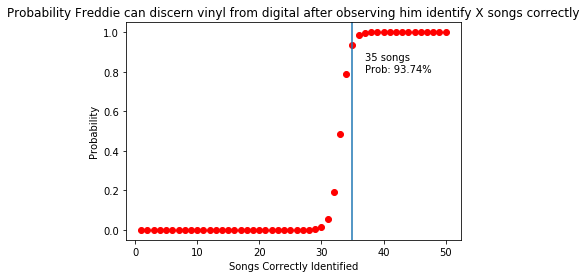

In [13]:
# Next, we can code this up and see where the probability breaks 90%
correct_songs = np.arange(1,51)

def prob_correct_iden(x):
    
    num = sps.binom.pmf(k = x, n = 50, p = 0.8)*0.5
    
    denom = sps.binom.pmf(k = x, n = 50, p = 0.5)*0.5
    
    prob = num/(num+denom)
    
    return prob

#

probs = pd.DataFrame({
    'Songs': correct_songs,
    'Prob': prob_correct_iden(correct_songs)
})


_ = plt.plot(probs['Songs'],
             probs['Prob'], 
             'ro')

_ = plt.axvline(x = probs['Songs'][probs['Prob'] > 0.9].iloc[0])

_ = plt.text(x = probs['Songs'][probs['Prob'] > 0.9].iloc[0] + 2, 
             y = 0.80,
             s = '%s songs\nProb: %s%%' % 
             (probs['Songs'][probs['Prob'] > 0.9].iloc[0], 
              np.round(probs['Prob'][probs['Prob'] > 0.9].iloc[0]*100,2)
             ))

_ = plt.ylabel('Probability')
_ = plt.xlabel('Songs Correctly Identified')

_ = plt.title('Probability Freddie can discern vinyl from digital after observing him identify X songs correctly')

# 2.8

You roll a fair, six-sided die twice. Let X be the sum of the two rolls. Find P(X = 7) using a conditioning argument; that is, do not simply count the number of ways to roll a 7 and divide by the number of possible combinations for the two rolls.

### 2.8 Analytical Solution

For *any* possible result from the first die {1,2,3,4,5,6} there is *always* another number from the second die that will bring the sum to 7. Seven is the only sum that has this property. If you want to sum to a 5, rolling anything above a 4 eliminates the possibility of getting that sum.

Here's what the sums look like for 7:

1 + 6 = 7  
2 + 5 = 7  
3 + 4 = 7  

For any roll on the first die, there is also *only* one other number from the second die that will bring the sum up to 7. This is highlighted by the table above. That means there is a 1/6 probability of rolling a sum of 7.

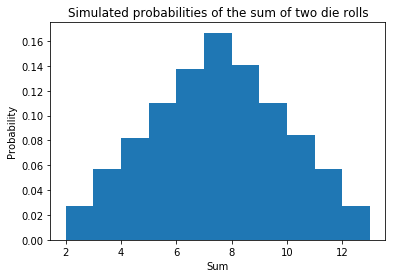

In [23]:
# Let's simulate some sums
def sum_sim(x):
    
    first_die = np.random.randint(low = 1, high = 7)
    second_die = np.random.randint(low = 1, high = 7)
    
    return first_die + second_die
    
sums = [sum_sim(0) for i in range(100000)]

_ = plt.hist(sums, density = True, bins = np.arange(2,14))
_ = plt.ylabel('Probability')
_ = plt.xlabel('Sum')

_ = plt.title('Simulated probabilities of the sum of two die rolls')

# 2.9

Imagine generating a random word by sampling $3 < n < 26$ letters, with replacement (from the 26 letters in the alphabet). What is the probability that this word has no repeats; i.e., n unique letters?

### 2.9 Analytical Solution

Let's first think about the denominator. Since we have 26 letters and a word of size n, there are $26^n$ total possible samplings with replacement where order matters. For example, if the word has a length of two, we have 26 choices for the first letter [A,B...Z]. We also have 26 choices for the second letter [A,B...Z]. This logic is identical for longer words.

The numerator has similar logic. If we have a word of length 3, we again have 26 choices for the first letter. If we choose 'A', the second letter can be anything from B to Z - 25 choices. Any letter choice reduces the letters we can use for future choices if we want to avoid repetition. The exact letter we choose doesn't matter, the pattern repeats. That is, there are 26 x 25 x 24 ... x (26 - n + 1) choices for the letters. This can be reformulated as:

# $\frac{26 * 25 * ... * (26-n+1)}{26^n} = \frac{\frac{26!}{(26-n)!}}{26^n}$


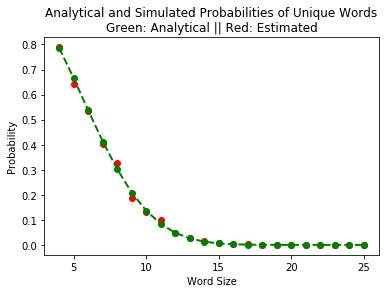

In [15]:
def prob_no_repeats_sim(length):

    ## Enumerating the letters as 1 to 26
    letters = np.random.randint(low = 1, high = 27, size = (length, 1000))

    n_unique = np.apply_along_axis(lambda x: (np.unique(x)).shape[0] == length, 0, letters)
    
    return np.mean(n_unique)

prob_no_repeats_sim = np.vectorize(prob_no_repeats_sim)

#

def prob_no_repeats_real(length):
    
    num = factorial(26)/(factorial(26-length))
    
    denom = (26**length)
    
    return num/denom

prob_no_repeats_real = np.vectorize(prob_no_repeats_real)
    
#

lens = np.arange(4,26)

#

probs = pd.DataFrame({
    'Len': lens,
    'Prob_Est': prob_no_repeats_sim(lens),
    'Prob_Real': prob_no_repeats_real(lens)
})


_ = plt.plot(probs['Len'],
             probs['Prob_Est'], 
             'ro')

_ = plt.plot(probs['Len'],
            probs['Prob_Real'],
            'go--',
            linewidth = 2)

_ = plt.ylabel('Probability')
_ = plt.xlabel('Word Size')

_ = plt.title('Analytical and Simulated Probabilities of Unique Words\nGreen: Analytical || Red: Estimated')

# 2.10

Ali and Bill are taking a test. For any single question, Ali has equal probabilities of answering correctly or incorrectly, and Bill also has equal probabilities of answering correctly or incorrectly. For any single question, the probability that both Ali and Bill get the question correct is .4. Given that Bill gets a question wrong, what is the probability that Ali gets it right?

### 2.10 Analytical Solution

Here's what we know so far:

1. $P(A) = P(B) = P(A^c) = P(B^c) = 0.50$  
2.  $P(A \cap B) = 0.40$  

We're looking for $P(A | B^c)$. We know that this term show's up in the total probability of A:

### $P(A) = P(A|B)P(B) + P(A|B^c)P(B^c)$  

If we rearrange to find what we want, we get:

## $P(A|B^c) = \frac{P(A) - P(A|B)P(B)}{P(B^c)}$

We're basically missing the conditional probability of A given B. However, we have all the pieces we need to figure it out:

## $P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{.4}{.5} = .8$

Finally:

## $P(A|B^c) = \frac{.5 - .8*.5}{.5} = .2$

# 2.11

Consider the birthday problem with the usual assumptions. Previously, we’ve considered a ‘match’ as a single day with multiple birthdays; here, imagine a week match, which consists of a week with multiple birthdays. Find the probability that, among n ≤ 52 people, there are no week matches and no day matches. For what value of n does this probability drop below 1/2?

You may have noticed that, by daycount conventions, the ‘52 weeks’ of the year do not go evenly into the 365 days. For this problem, assume that there are 364 days in the year, not 365, just for simplicity, so that the weeks perfectly divide up the year.

### 2.11 Analytical Solution

Let's first generalize the classic solution to an n-period one:

## $P(no `period` match) = \frac{period * (period - 1) * (period - 2)... * (period - n + 1)}{\text{period}^{n}} = \frac{\frac{period!}{(period - n)!}}{\text{period}^{n}}$

The problem appears to be tricky because it asks for no week matches **and** no day matches. However, we know that anytime we have a day match, we automatically have a week match. All day matches are also week matches.

The only thing we really care about are week matches. Using the generalization above, we get:

## $P(no `period` match) = \frac{\frac{52!}{(52 - n)!}}{52^{n}}$

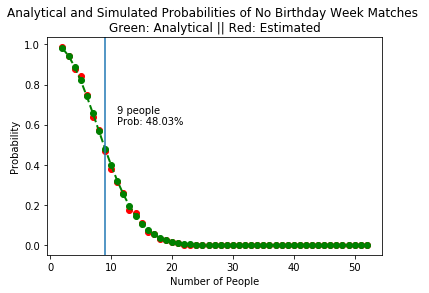

In [16]:
# Next, we can code this up and see where the probability breaks below 50%
# Code is similar to 2.10
def prob_no_match_sim(n):

    ## Enumerating the weeks as 1 to 52
    letters = np.random.randint(low = 1, high = 53, size = (n, 1000))

    n_unique = np.apply_along_axis(lambda x: (np.unique(x)).shape[0] == n, 0, letters)
    
    return np.mean(n_unique)

prob_no_match_sim = np.vectorize(prob_no_match_sim)

#

def prob_no_match_real(n):
    
    num = factorial(52)/(factorial(52-n))
    
    denom = (52**n)
    
    return num/denom

prob_no_match_real = np.vectorize(prob_no_match_real)
    
#

people = np.arange(2,53)

#

probs = pd.DataFrame({
    'People': people,
    'Prob_Est': prob_no_match_sim(people),
    'Prob_Real': prob_no_match_real(people)
})


_ = plt.plot(probs['People'],
             probs['Prob_Est'], 
             'ro')

_ = plt.plot(probs['People'],
            probs['Prob_Real'],
            'go--',
            linewidth = 2)


_ = plt.axvline(x = probs['People'][probs['Prob_Real'] < 0.5].iloc[0])

_ = plt.text(x = probs['People'][probs['Prob_Real'] < 0.5].iloc[0] + 2, 
             y = 0.60,
             s = '%s people\nProb: %s%%' % 
             (probs['People'][probs['Prob_Real'] < 0.5].iloc[0], 
              np.round(probs['Prob_Real'][probs['Prob_Real'] < 0.5].iloc[0]*100,2)
             ))

_ = plt.ylabel('Probability')
_ = plt.xlabel('Number of People')

_ = plt.title('Analytical and Simulated Probabilities of No Birthday Week Matches \nGreen: Analytical || Red: Estimated')

# 2.12

Consider the birthday problem with the usual assumptions. Define a ‘month match’ as a month with more than one birthday. Given that there is at least one ‘month match’, find the probability that there is at least one ‘day match’ (i.e., a day where multiple people are born) among n ≤ 12 people. Compare this probability to the ‘unconditional’ probability of at least one day match in the standard birthday problem.

For this problem, assume 360 days in a year, and that each of the 12 months has 30 days, just so we don’t have to worry about the fact that months have irregular amounts of days.

### 2.12 Analytical Solution

Intuitively, the probability that we have a day match given the fact we already have a month match should be higher than the vanilla daily match probability. This is likely more pronounced with small sample sizes. If we have two people and we know their birthdays are in the same month, it makes sense the probability that their birthdays are on the same day is higher than a situation where we didn't know about the month coincidence.

First, we can set this up using Bayes' Theorem:

## $\text{P(day match | month match)} = \frac{\text{P(month match | day match) * P(day match)}}{\text{P(month match)}}$

Also, we can see that P('period' match) is just the complement of the generalized birthday solution from the previous problem, which deals with P(no 'period' match):

## $P(`period` match) = 1 - \frac{period * (period - 1) * (period - 2)... * (period - n + 1)}{\text{period}^{n}} = 1-  \frac{\frac{period!}{(period - n)!}}{\text{period}^{n}}$

I just want to clarify that 'period' match refers explicitly to *at least one match*. 'period' is just shorthand. 

Now we can start to chip away at Bayes' Theorem from above. We can see that P(month match | day match) = 1. This is because when we have a day match, we will *always* have a month match. Let's simplify and substitute into the formula:

## $\text{P(day match | month match)} = \frac{\text{P(month match | day match) * P(day match)}}{\text{P(month match)}} = \frac{\text{P(day match)}}{\text{P(month match)}}$

# $\frac{\text{P(day match)}}{\text{P(month match)}} = \frac{1-  \frac{\frac{360!}{(360 - n)!}}{\text{360}^{n}}}{1-  \frac{\frac{12!}{(12 - n)!}}{\text{12}^{n}}}$

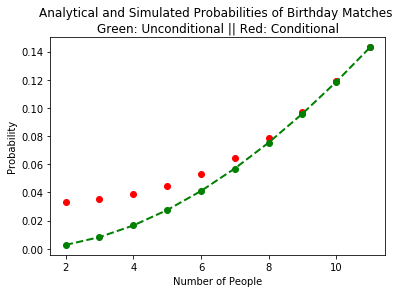

In [17]:
# Let's compare the conditional and unconditional numbers
def cond_prob(n):
    
    # Numerical stability issues when trying factorial(360)
    num1 = np.prod(np.arange(360-n+1,361, dtype=object))
    
    denom1 = (360**n)
    
    #
    
    num2 = factorial(12)/(factorial(12-n))
    
    denom2 = (12**n)
    
    return (1 - num1/denom1)/(1 - num2/denom2)

cond_prob = np.vectorize(cond_prob)

#

def uncond_prob(n):
    
    # Numerical stability issues when trying factorial(360)
    num1 = np.prod(np.arange(360-n+1,361, dtype=object))
    
    denom1 = (360**n)
    
    return (1 - num1/denom1)

uncond_prob = np.vectorize(uncond_prob)

#

people = np.arange(2,12)

#

probs = pd.DataFrame({
    'People': people,
    'Con_Prob': cond_prob(people),
    'Uncond_Prob': uncond_prob(people)
})


_ = plt.plot(probs['People'],
             probs['Con_Prob'], 
             'ro')

_ = plt.plot(probs['People'],
            probs['Uncond_Prob'],
            'go--',
            linewidth = 2)

_ = plt.ylabel('Probability')
_ = plt.xlabel('Number of People')

_ = plt.title('Analytical and Simulated Probabilities of Birthday Matches \nGreen: Unconditional || Red: Conditional')

# 2.13

Cameron is wandering around on the alphabet (A, B, etc.). He goes ‘up’ a letter (i.e., from D to C) and ‘down’ a letter (i.e., D to E) with equal probabilities. He cannot go from A to Z, nor Z to A (i.e., the alphabet isn’t circular).

If he starts at M, what is the probability that Cameron spells “HI” before he spells “NO”? Here, we equate ‘spelling’ a word to wandering around on its letters in the correct order; i.e., if Cameron wanders on PQPQR as a part of his path, then he spelled PQPQR (among other words).

### 2.13 Analytical Solution

This is similar to the [clock version](https://www.youtube.com/watch?v=2qeh4wZ2VX8&list=PLRogqfr-vZMfs9CqU80IRIQZOexx23gQl&index=1) of Gambler's Ruin from the chapter. Let's go over what we know:

1) The alphabet isn’t circular  
2) If you get to 'H', there is a 100% probability you will spell 'HI' before you spell 'NO'  
3) If you get to 'O', you have already spelled 'NO'  

So we only care about getting to 'H' and 'O'. Let's remap that section of the alphabet so it looks more like Gambler's Ruin:

0 1 2 3 4 **5** 6 7  
H I J K L **M** N O  

The solution from the original problem looks like:

$P(A) = \frac{i}{N}$.

Let's redefine those variables to make them a little more general.

$P(A)$ is the probability of hitting the upper bound first.  
$1 - P(A)$ is the probability of hitting the lower bound first.  
$i$ is the index of the starting location.  
$N$ is the total number of locations the random walk can visit - 1.  


We know we have a $\frac{5}{7}$ probability of hitting the upper bound first, spelling 'NO' before 'HI'. The probability of hitting the lower bound first must be the complement of that, $\frac{2}{7}$.

In [18]:
results = np.zeros(10000)

for i in range(len(results)):

    location = 5

    # Enumerating H to O as 0:7
    while location not in [0,7]:

        location += np.random.choice([-1,1])
    
    results[i] = location
    
print('\nProbability of spelling `NO` first:')
print(np.mean(results == 7))

print('\nProbability of spelling `HI` first:')
print(np.mean(results == 0))

print('\n True probabilities:')
print(np.round(5/7,3))
print(np.round(2/7,3))


Probability of spelling `NO` first:
0.7077

Probability of spelling `HI` first:
0.2923

 True probabilities:
0.714
0.286


# 2.14

Imagine the standard Monty Hall problem, but Monty does not actually know what is behind each door; he picks one of the two remaining doors at random.

You pick Door 1 (for this problem, assume that you always pick Door 1), and Monty opens Door 2 to reveal a goat. Should you switch to Door 3?

### 2.14 Analytical Solution

Let's define some variables and set this up as Bayes' Theorem:

C = the car is behind door 1  
G = Monty opens door 2 and reveals a goat

## $P(C|G) = \frac{P(G|C)P(C)}{P(G)}$

Next, let's try to reason about the probabilities of each of these components. P(C) is pretty straight forward, there's always a 1/3 probability the car is behind door 1.

Next up is P(G|C). If the car is behind door 1, there must be goats behind doors 2 and 3. Monty could pick either door 2 or door 3 for his next step. There's a 1/2 probability of him specifically picking the second door.

Finally, P(G) is a little tricky. We can break this up into the two halves:   
1) Monty opens door 2  
2) Door 2 has a goat  

Let's also recognize that these events are independent - picking door 2 has no impact on there actually being a goat there. The probability of opening door 2 is 1/2 - only doors 2 and 3 are left after we've opened the first door. The unconditional probability of door 2 having a goat is 2/3, there are two goats and three doors. Since these events are independent, we can multiply them together to get the total probability that Monty opens door 2 *and* reveals a goat. 1/2 x 2/3 = 1/3.

Bringing it all together:

## $P(C|G) = \frac{P(G|C)P(C)}{P(G)} = \frac{1/2 * 1/3}{1/3} = 1/2$

Switching doesn't matter here.

The intuition here is that in the original problem, Monty *always* picks the door with a goat behind it. The fact that there is always a goat behind the door gives us extra information about the remaining doors. Monty is never wrong.

In this problem, Monty is just randomly picking doors with no prior knowledge about what's behind them. We went from having [???] locations for the 1 car and 2 goats to [?x?]. It's clear that there's now a 50% probability - there's only one car and one goat left. 

# 2.15

Brandon is a cell. He splits into 2 with probability 1/2 and dies with probability 1/2. His offspring do the same, independently (each splits into 2 or die with equal probabilities). Let E be the probability that Brandon’s population goes extinct. Find P(E).

Hint: condition on the first step.

### 2.15 Analytical Solution

There are a few ways to approach this problem. 

First, when we usually talk about probability, we're looking for a proportion of favorable outcomes to total outcomes. In this case our 'total outcomes' is infinite. Imagine simulating an infinitely large set of universes, each in which Brandon gets to continue his process forever. 

**First Approach**  

For any time step, t, the upper bound on the population size in any universe is $2^t$. If we're at time step 3, Brandon can only get as large as 8 cells. The probability of every Brandon cell dying is (1/2)^3 = 1/8 = 0.125.

For time steps other than 3, this should look like:

Time Step ||--1----2----3-----4  ...    t  
Prob Extn ||-1/2--1/4--1/8--1/16 ... 1/(2^t)  

In our infinitely large set of universes, the total population will reach pretty much every size. Remember, we have an infinite number of time steps for each population *and* and infinite number of evolutionary processes.

So the total probability of the population going extinct at every *size* is:

## $1/2 + 1/4 + 1/8 + ... + 1/(2^t) = \sum_{t = 1}^{\infty} \frac{1}{2^t}$

This [geometric series](https://en.wikipedia.org/wiki/1/2_%2B_1/4_%2B_1/8_%2B_1/16_%2B_%E2%8B%AF) converges to 1. Therefore the probability the population goes extinct is 100%. You can learn more about series and sequences [here](https://www.coursera.org/learn/advanced-calculus).

** Second Approach **  

Let's define a new event $D$, Brandon doubling. That means that $D^c$ is the event of a Brandon not doubling. These are both 1/2, this is from the problem setup above. Next, we can use the Law of Total Probability when conditioning on the first step:

### $P(E) = P(E|D)P(D) + P(E|D^c)P(D^c)$

Let's go over what we know:  
$P(D) = P(D^c) = $ 1/2  
$P(E|D^c)$ = 1

So now we have:

### $P(E) = P(E|D) * 1/2 + 1/2$ 

Let's think about $P(E|D)$. If Brandon doubles after the first step, there are now two new cells. Each cell has its own probability of going extinct. These probabilities have to be equal by symmetry. There's nothing special about computing probabilities for the first new Brandon versus the second one. They're both P(E). These branches are also completely independent, which means we can multiply their probabilities. 

### $P(E) = P(E) * P(E) * 1/2 + 1/2$
### $P(E) = \frac{P(E)^2}{2} + 1/2$
### $0 = \frac{P(E)^2}{2} - P(E) + 1/2$

We eventually get that P(E) = 1.

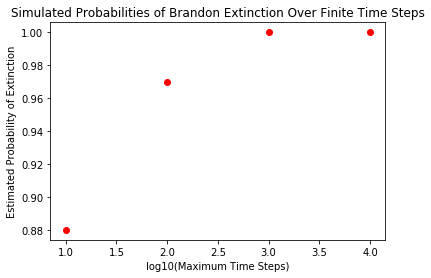

In [19]:
# Let's try to simulate the probability of extinction
# Simulate 100 samples of 10, 100, 1000, 10000 time steps 
# Does the probability of extinction go up with time?

# For every cell, sample [0,2] (death,split)
# Sum all of the samples to see the total number of cells left
def sim_timestep(current_size):
    
    return np.sum(np.random.choice([0,2], current_size))

#

# Runs one evolutionary path
def sim_evolution(num_steps):
    
    # Dealing with the first step
    brandon = 1
    
    for i in range(num_steps):
        
        brandon = sim_timestep(brandon)
        
        if brandon == 0: 
            break
        
    return brandon
    
#

# Runs simulation of simulations
# Returns % of sims where extinction occurs
def sim_extinction(num_steps, num_sims = 100):
    
    res = np.array([sim_evolution(num_steps) for i in range(num_sims)])
    
    return np.mean(res == 0)

#

sim_extinction = np.vectorize(sim_extinction)

#

timesteps = np.array([10,100,1000,10000])

#

probs = pd.DataFrame({
    'Max_Time': timesteps,
    'Prob_Extn': sim_extinction(timesteps)
})


_ = plt.plot(np.log10(probs['Max_Time']),
             probs['Prob_Extn'], 
             'ro')

_ = plt.ylabel('Estimated Probability of Extinction')
_ = plt.xlabel('log10(Maximum Time Steps)')

_ = plt.title('Simulated Probabilities of Brandon Extinction Over Finite Time Steps')

# 2.16

The little hand on a standard clock moves clockwise one unit (i.e., from 5 to 6) or counter-clockwise 1 unit (i.e., 1 to 12) with equal probabilities.

Find the probability that, from its starting spot, the little hand makes it a full day forward (24 hours, clockwise) before it makes it a half day backward (12 hours, counterclockwise). It does not matter how long the little hand takes to get to these endpoints; we only care about the location of the little hand relative to its starting spot.

### 2.16 Analytical Solution

This is very similar to 2.13 and the ['clock version'](https://www.youtube.com/watch?v=2qeh4wZ2VX8&list=PLRogqfr-vZMfs9CqU80IRIQZOexx23gQl&index=1) of Gambler's Ruin from the main lesson. We're going to imagine 'breaking' the clock at 12, the starting points, and unrolling the numbers onto a straight number line.

The number 0 will represent going 12 hours back and 36 will represent going 24 hours ahead. Using the result from Gambler's Ruin we can see that:

## $P('win') = \frac{\text{starting point}}{\text{size of line}} = \frac{i}{N} = \frac{12}{36} \approx 0.33$

# 2.17

There are three prisoners in a room. Each will be independently given a red hat or a green hat to wear on their head (each has a 50/50 chance of a red or a green hat and, again, the colors that they are assigned are independent). The prisoners can see each others hats, but no prisoner can see his own hat. Each prisoner is given a chance to guess the color of his own hat (which he cannot see); they can either guess a color (red or green) or pass. If at least one prisoner correctly guesses the color of his own hat and no prisoners incorrectly guess the color of their own hat, they are free to go (‘passing’ cannot count as either a correct or incorrect guess; it is merely a pass). The prisoners are not allowed to communicate with each other in any way once in the room, and they must cast their guesses simultaneously (i.e., one prisoner cannot adapt his strategy based on another prisoner guessing). The prisoners are allowed a strategy session before where they can discuss the best approach.


Upon first hearing this riddle, it seems like the best chance the prisoners have of escaping is assigning one person to randomly guess the color of their own hat, and the other two to simply pass. This results in a 50/50 chance of success (either the person guessing gets his color, or not). However, there is a superior strategy: if a prisoner sees two hats of the same color (i.e., he sees that the other two prisoners both have red hats) he guesses the other color for his own hat. If he sees that the other two prisoners have different color hats, he passes.

a) Find the probability of winning with the ‘superior strategy’.  

b) You should have arrived at a probability greater than .5 in part (a). Your friend Nick hears about this strategy and says “well, then, if I see that the other two prisoners both have green hats, then there is a greater than .5 probability that my hat is red”. Is Nick correct? Explain.  

### 2.17.a Analytical Solution

Let's try to simply count the situations in which the prisoners win with this 'superior' strategy. We're going to set up a table with the possible hat color patterns and what each prisoner would do. If there is at least one 'loser' (L), all of the prisoners lose. However any pattern with at least one 'winner' (W) and no losers means the prisoners win.

Counting this way shows us that the strategy is effective in 6 out of 8 scenarios, giving a probability of .75.

In [20]:
pd.DataFrame({
    'Hat Pattern': ['GGG','GGR','GRR','RRG','RGG','RRR','RGR','GRG'],
    'Pris 1 Guess': ['R','Pass','G','Pass','R','G','Pass','Pass'],
    'Pris 2 Guess': ['R','Pass','Pass','Pass','Pass','G','G','R'],
    'Pris 3 Guess': ['R','R','Pass','G','Pass','G','Pass','Pass'],
    'Result': ['Lose','Win','Win','Win','Win','Lose','Win','Win']
})

,Hat Pattern,Pris 1 Guess,Pris 2 Guess,Pris 3 Guess,Result
0,GGG,R,R,R,Lose
1,GGR,Pass,Pass,R,Win
2,GRR,G,Pass,Pass,Win
3,RRG,Pass,Pass,G,Win
4,RGG,R,Pass,Pass,Win
5,RRR,G,G,G,Lose
6,RGR,Pass,G,Pass,Win
7,GRG,Pass,R,Pass,Win


### 2.17.b Analytical Solution

There's a clear distinction to be made between this strategy's effectiveness *overall* and in *specific* games for a certain prisoner. Let's assume that Nick is prisoner 3. Using the table above, we can see that he is in either situation 1 or 2. It’s clear that there's a 50/50 chance that his hat is red. The logic is the same if he happens to be prisoner 1 or 2.

Each prisoner's probability of being right or wrong isn't impacted by him seeing the other colors. However, the overall probability of *all* prisoners working together to win gets impacted by what they each see. It’s more common to see 2 matching hats and 1 different hat out in the wild than 3 identical hats. We can actually see this with the Binomial PMF:

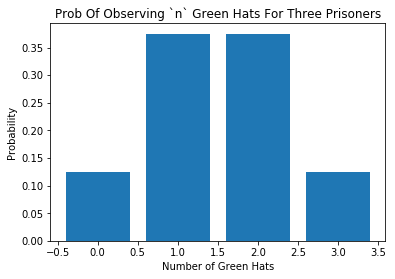

In [21]:
probs = pd.DataFrame({
    'Num_Green': [0,1,2,3],
    'Prob_Green': sps.binom.pmf(k = [0,1,2,3], n = 3, p = 0.5)
})


_ = plt.bar(probs['Num_Green'],
             probs['Prob_Green'])

_ = plt.ylabel('Probability')
_ = plt.xlabel('Number of Green Hats')

_ = plt.title('Prob Of Observing `n` Green Hats For Three Prisoners')

In [22]:
# Let's simulate this ideal strategy
# Simulates one round Red = 0, Green = 1, Pass = -1
def round(x):
    
    # Generate true hat colors
    hats = np.random.randint(0, 2, size = 3)
    
    # Record guesses
    guess = np.zeros(3, dtype='int')
    
    # Prisoner 1
    if hats[1] == hats[2]:
        guess[0] = 1 - hats[1]
    else:
        guess[0] = -1
        
    # Prisoner 2
    if hats[0] == hats[2]:
        guess[1] = 1 - hats[0]
    else:
        guess[1] = -1
        
    # Prisoner 3
    if hats[0] == hats[1]:
        guess[2] = 1 - hats[0]
    else:
        guess[2] = -1
        
    # Index of which prisoners actually made guesses
    made_guess = guess != -1
    
    return all(guess[made_guess] == hats[made_guess])

#

results = np.array([round(i) for i in range(10000)])

np.mean(results)

0.749